# Assingment1

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import time #Only used for my testing of he time taken to run the KNN algo.

In [2]:
message = "{}: {}" #Template to display the varous measurments of the training

In [3]:
# Data ti test the various functions are workking properly
actual = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0])
prediction = np.array([1,1,0,1,0,0,1,1,0,1,0,1,1,0,1])

### 1) Calculate the Equcledian Distance between two vectors

In [4]:
# Eucledian distance function to calculate the 
# distance between to points of equal dimension 
# in eucledian space
def eucledianDistance(x, y):
    z = x - y
    z = z**2
    return np.sqrt(np.sum(z))
    

x = np.array([[1, 2, 3],[1, 2 ,3]])
y = np.array([[4, 5, 6], [4,5,6]])
          
eucledianDistance(x, y)

7.3484692283495345

### 2) Calculate the Manhattan Distance between two vectors

In [5]:
# Manhattan distance function to calculate the 
# distance between to points of equal dimension
# usingt the absolout distance
def manhattanDistance(x, y):
    z = x - y
    return np.sum(np.abs(z))
    

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
             
manhattanDistance(x, y)

9

### 3) Calculate the Accuracy and Generalization error between two vectors

### 3.1 function to calculate the Accuracy between two vectors using cosine similarity

In [6]:
# Accuracy function to display how well the 
# model was able to make a prediction
def accuracy(x):
    return (x[0]+x[3])/sum(x)

### 3.2 function to calculate the Generalization Error between two vectors using Mean Squared Error

In [7]:
# Generaliation error function to mesure how well the
# model is able to predict outcomes it hasn't seen before
def genError(x, y):
    return np.sum((x - y)**2)/len(x) 

## 4) Computing the precision, recall and F1 score

### 4.1 function to compute precision

In [8]:
# Preciciosn function to identify what proportion 
# of positive identification is actually correct
def pre(con):
    return con[0]/(con[0] + con[2])

### 4.2 function to comute recall

In [9]:
# Recall function to identify what proportion
# of ACTUAL positives were done correctly
def rec(con):
    return con[0]/(con[0] + con[1])

### 4.3 function to compute the F1 score

In [10]:
# F1 score fucntion using the precsion and recall functions above
# to evaluate the performance of the model
def F1_score(con):
    p = pre(con)
    r = rec(con)
    return 2 *(p * r) / (p + r)

## 5) Cumputation of the Confusion Matrix

In [11]:
# Confusion matrix function to describe how many examples are
# identified as True Positive, False Negative, False Positive, 
# and True Positive
def confusionMatrix(x, y):
    confMat = np.array([0,0,0,0])
    for i in range(len(x)):
        if (x[i] == 1 and y[i]==1):
            confMat[0] += 1
        elif (x[i] == 0 and y[i]==0):
            confMat[3] += 1
        elif (x[i] == 0 and y[i]==1):
            confMat[2] += 1
        else:
            confMat[1] += 1
        
    return confMat

##### **Testing the various functions using the dummy data above**

In [12]:
confMat = confusionMatrix(actual, prediction)
print(confMat)

[5 3 4 3]


In [13]:
accuracy(confMat)

0.5333333333333333

In [14]:
genError(actual, prediction)

0.4666666666666667

In [15]:
pre(confMat)

0.5555555555555556

In [16]:
rec(confMat)

0.625

In [17]:
F1_score(confMat)

0.5882352941176471

## 6) Generation of the Receiver Operation Charachteristic (ROC) curve

In [18]:
# Receiver Operation Charachteristic 
# curev fuction that is able to diplay the confusion matrix 
# at different thresholds for model performance
def rate(actual, predictions):
    # Obtaing different thresholds to test
    thresholds = sorted(predictions)[::-1]
    
    # arrays to hold the true positive and false positive rates
    tpr = []
    fpr = []
    
    # Use the different thresholds and points at those thresholds 
    # to compute the comfuciotn matrix and observe performance
    for i in thresholds:
        for j in prediction:
            if j >= threshold:
                p = [j]
                    
        # Confusion matrix at that threshold
        cm = confusionMatrix(actual, p)
            
        # Obtain the tpr and fpr append it to the array in similar indexes 
        if (cm[0] + cm[1]) > 0:
            tpr.append(cm[0]/(cm[0]+cm[1]))
        else:
            tpr.append(0)
            
        if (cm[2] + cm[3]) > 0:
            tpr.append(cm[2]/(cm[2]+cm[3]))
        else:
            tpr.append(0)
    
    return sorted(tpr), sorted(fpr)

#tpr, fpr = rate(actual, prediction)
#plt.plot(fpr, tpr)
#plt.xlabel('False Positive Rate (FPR)')
#plt.ylabel('True Positive Rate (TPR)')
#plt.title('ROC Curve')
#plt.show()

## 7) Computation of area under curve (AUC) for ROC

In [19]:
# AOC of ROC to measure performance across 
# all possible classification thresholds
def auc_roc(fpr, tpr):
    auc = 0.0
    for i in range(1, len(fpr)):
        auc += (fpr[i] - fpr[i-1]) * (tpr[i] + tpr[i-1]) / 2

    return auc

## 8) Precision-Recall curve

In [20]:
# Prediciotn Recall curve funciton to obtain the precision
# and recall at threshold to see the tradoffs between the two
def rate(actual, predictions):
    thresholds = sorted(predictions)[::-1]
    pre = []
    rec = []
    
    for i in thresholds:
        for j in prediction:
            if j >= threshold:
                p = [j]
                    
        cm = confusionMatrix(actual, p)
            
        if (cm[0] + cm[2]) > 0:
            pre.append(cm[0]/(cm[0]+cm[2]))
        else:
            pre.append(0)
            
        if (cm[0] + cm[1]) > 0:
            rec.append(cm[0]/(cm[0]+cm[1]))
        else:
            rec.append(0)
    
    return sorted(pre), sorted(rec)

#pre, rec = rate(actual, prediction)
#plt.plot(pre, rec)
#plt.xlabel('Prediction')
#plt.ylabel('Recall')
#plt.title('Prediction vs Recall Curve')
#plt.show()

***

## 9) KNN_Classifier class

In [21]:
# K-Nearest Neighbor class to classify a new data point by 
# estimating the proximity of the new data point to the new 
# point based on differnt measurmeents as seen belw
class KNN_Classifier:

    def __init__(self):
        self.features = None   # Used to hold the training features
        self.labels = None     # Used to hold the labels for the features 
        self.nn = None         # Used to check a ceratin number of points
        self.weights = None    # Used to decide how to weigh the point distaces
         self.EorU = None      # Used to determine what distance metric to use
        
    # Method to be able to identify the various necessities to model the data
    def fit(self, X, Y, n_neighbors, weights="uniform", distance="eucledian"):
        self.features = X
        self.labels = Y
        self.nn = n_neighbors
        self.weights = weights
        self.EorU = distance
      
    # Method to predic the classification based on how the model was trined
    def predict(self, X):
        
        # Obtain the length of the various data used, as well as a prediction
        # array to hold the predicted classification, which will be returned 
        s = len(self.features)
        l = len(X)
        pred = []
        lab = t.labels['quality'].tolist()
        
        # A nested for loop to check all the testing data aginst all of the 
        # trining data dor the classification
        for i in range(l):
            distance = []
            for j in range (s):
                
                # Identifies if the model is using manhattan or eucledian 
                # distance to determine the classificaiton
                if (self.EorU == "manhattan"):
                    dis = manhattanDistance(X.iloc[i], self.features.iloc[j])
                else:
                    dis = eucledianDistance(X.iloc[i], self.features.iloc[j])

                distance.append(dis)
            
            # Sorts the proximity of the points relative to the new data point
            # in ascending order along with the label for each point 
            combined = list(zip(distance, lab))
            sorted_combined = sorted(combined, key=lambda x: x[0])
            
            # Obtains on the n amount of pints nearest to the new point
            nn_dis = sorted_combined[:self.nn]
            
            # Detemines if it is using unifor  of distance 
            # metrics for the classification
            if (self.weights == "distance"):
                weight_good = 0
                weight_bad = 0

                for z in range(self.nn):
                    if nn_dis[z][1] == 1:
                        if nn_dis[z][0] == 0:
                            weight_good += 0
                        else:
                            weight_good += 1/nn_dis[z][0]
                    else:
                        if nn_dis[z][0] == 0:
                            weight_bad += 0
                        else:
                            weight_bad += 1/nn_dis[z][0]

                pred.append(0 if weight_bad>weight_good else 1)
            else: 
                counter = 0

                for z in range(self.nn):
                    if nn_dis[z][1] == 1:
                        counter += 1
                    else:
                        counter -= 1

                pred.append(1 if counter > 0 else 0)
                
        # Returns the prediction each pint in the testing data
        return  pred

## 10) Import csv file as a Pandas data frame

In [22]:
# Imports the wine information from the csv file and 
# transform it into a pandas data frame
wine_data = pd.DataFrame(pd.read_csv('winequality-white.csv', sep=';'))

In [23]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 11) Obtaining the good and bad values for each entry

In [24]:
# Classifies the wine with eiter good or bad labels based on the 
# quality, where 1 is quality > 5 and 0 is quality <=5
def goodORbad(q):
    if q > 5:
        return 1
    else:
        return 0

wine_data['quality'] = wine_data['quality'].apply(goodORbad)

In [25]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


## 12) Mean, std and quartiels for each variable

### 12.1) Mean

In [26]:
# Obatin the mean of each feature in the dataset
wine_mean = wine_data.mean()
wine_mean

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   0.665169
dtype: float64

### 12.2) Standard Deviation

In [27]:
# Obatin the standard deviation of each feature in the dataset
wine_std = wine_data.std()
wine_std

fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
quality                  0.471979
dtype: float64

### 12.3) Quartiles

In [28]:
# Obtain the quartiles of each feature in the data set
Q1 = wine_mean - (.675 * wine_std)
Q3 = wine_mean + (.675 * wine_std)

In [29]:
Q1

fixed acidity             6.285177
volatile acidity          0.210205
citric acid               0.252503
residual sugar            2.967776
chlorides                 0.031025
free sulfur dioxide      23.828267
total sulfur dioxide    109.674464
density                   0.992009
pH                        3.086341
sulphates                 0.412812
alcohol                   9.683598
quality                   0.346583
dtype: float64

In [30]:
Q3

fixed acidity             7.424399
volatile acidity          0.346277
citric acid               0.415880
residual sugar            9.815054
chlorides                 0.060520
free sulfur dioxide      46.787903
total sulfur dioxide    167.046851
density                   0.996046
pH                        3.290192
sulphates                 0.566882
alcohol                  11.344936
quality                   0.983756
dtype: float64

## 13) Shuffle rows of wine data

In [31]:
# Shuffkes the rows of the data set for randomness in the testing
shuffeled_wine = wine_data.sample(frac=1)
shuffeled_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4727,6.0,0.25,0.28,7.70,0.053,37.0,132.0,0.99489,3.06,0.50,9.4,1
3218,6.5,0.29,0.25,2.50,0.142,8.0,111.0,0.99270,3.00,0.44,9.9,0
2389,6.8,0.46,0.26,2.70,0.042,28.0,83.0,0.99114,3.38,0.51,12.0,1
4279,6.2,0.24,0.27,16.80,0.040,48.0,129.0,0.99691,3.23,0.38,10.5,1
3341,7.6,0.17,0.27,4.60,0.050,23.0,98.0,0.99422,3.08,0.47,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
353,7.3,0.33,0.40,6.85,0.038,32.0,138.0,0.99200,3.03,0.30,11.9,1
1982,7.6,0.20,0.30,14.20,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,1
3150,5.8,0.39,0.47,7.50,0.027,12.0,88.0,0.99070,3.38,0.45,14.0,1
2188,6.4,0.18,0.32,9.60,0.052,24.0,90.0,0.99630,3.35,0.49,9.4,1


## 14&15) Pairplots, corrolation, and redundancies

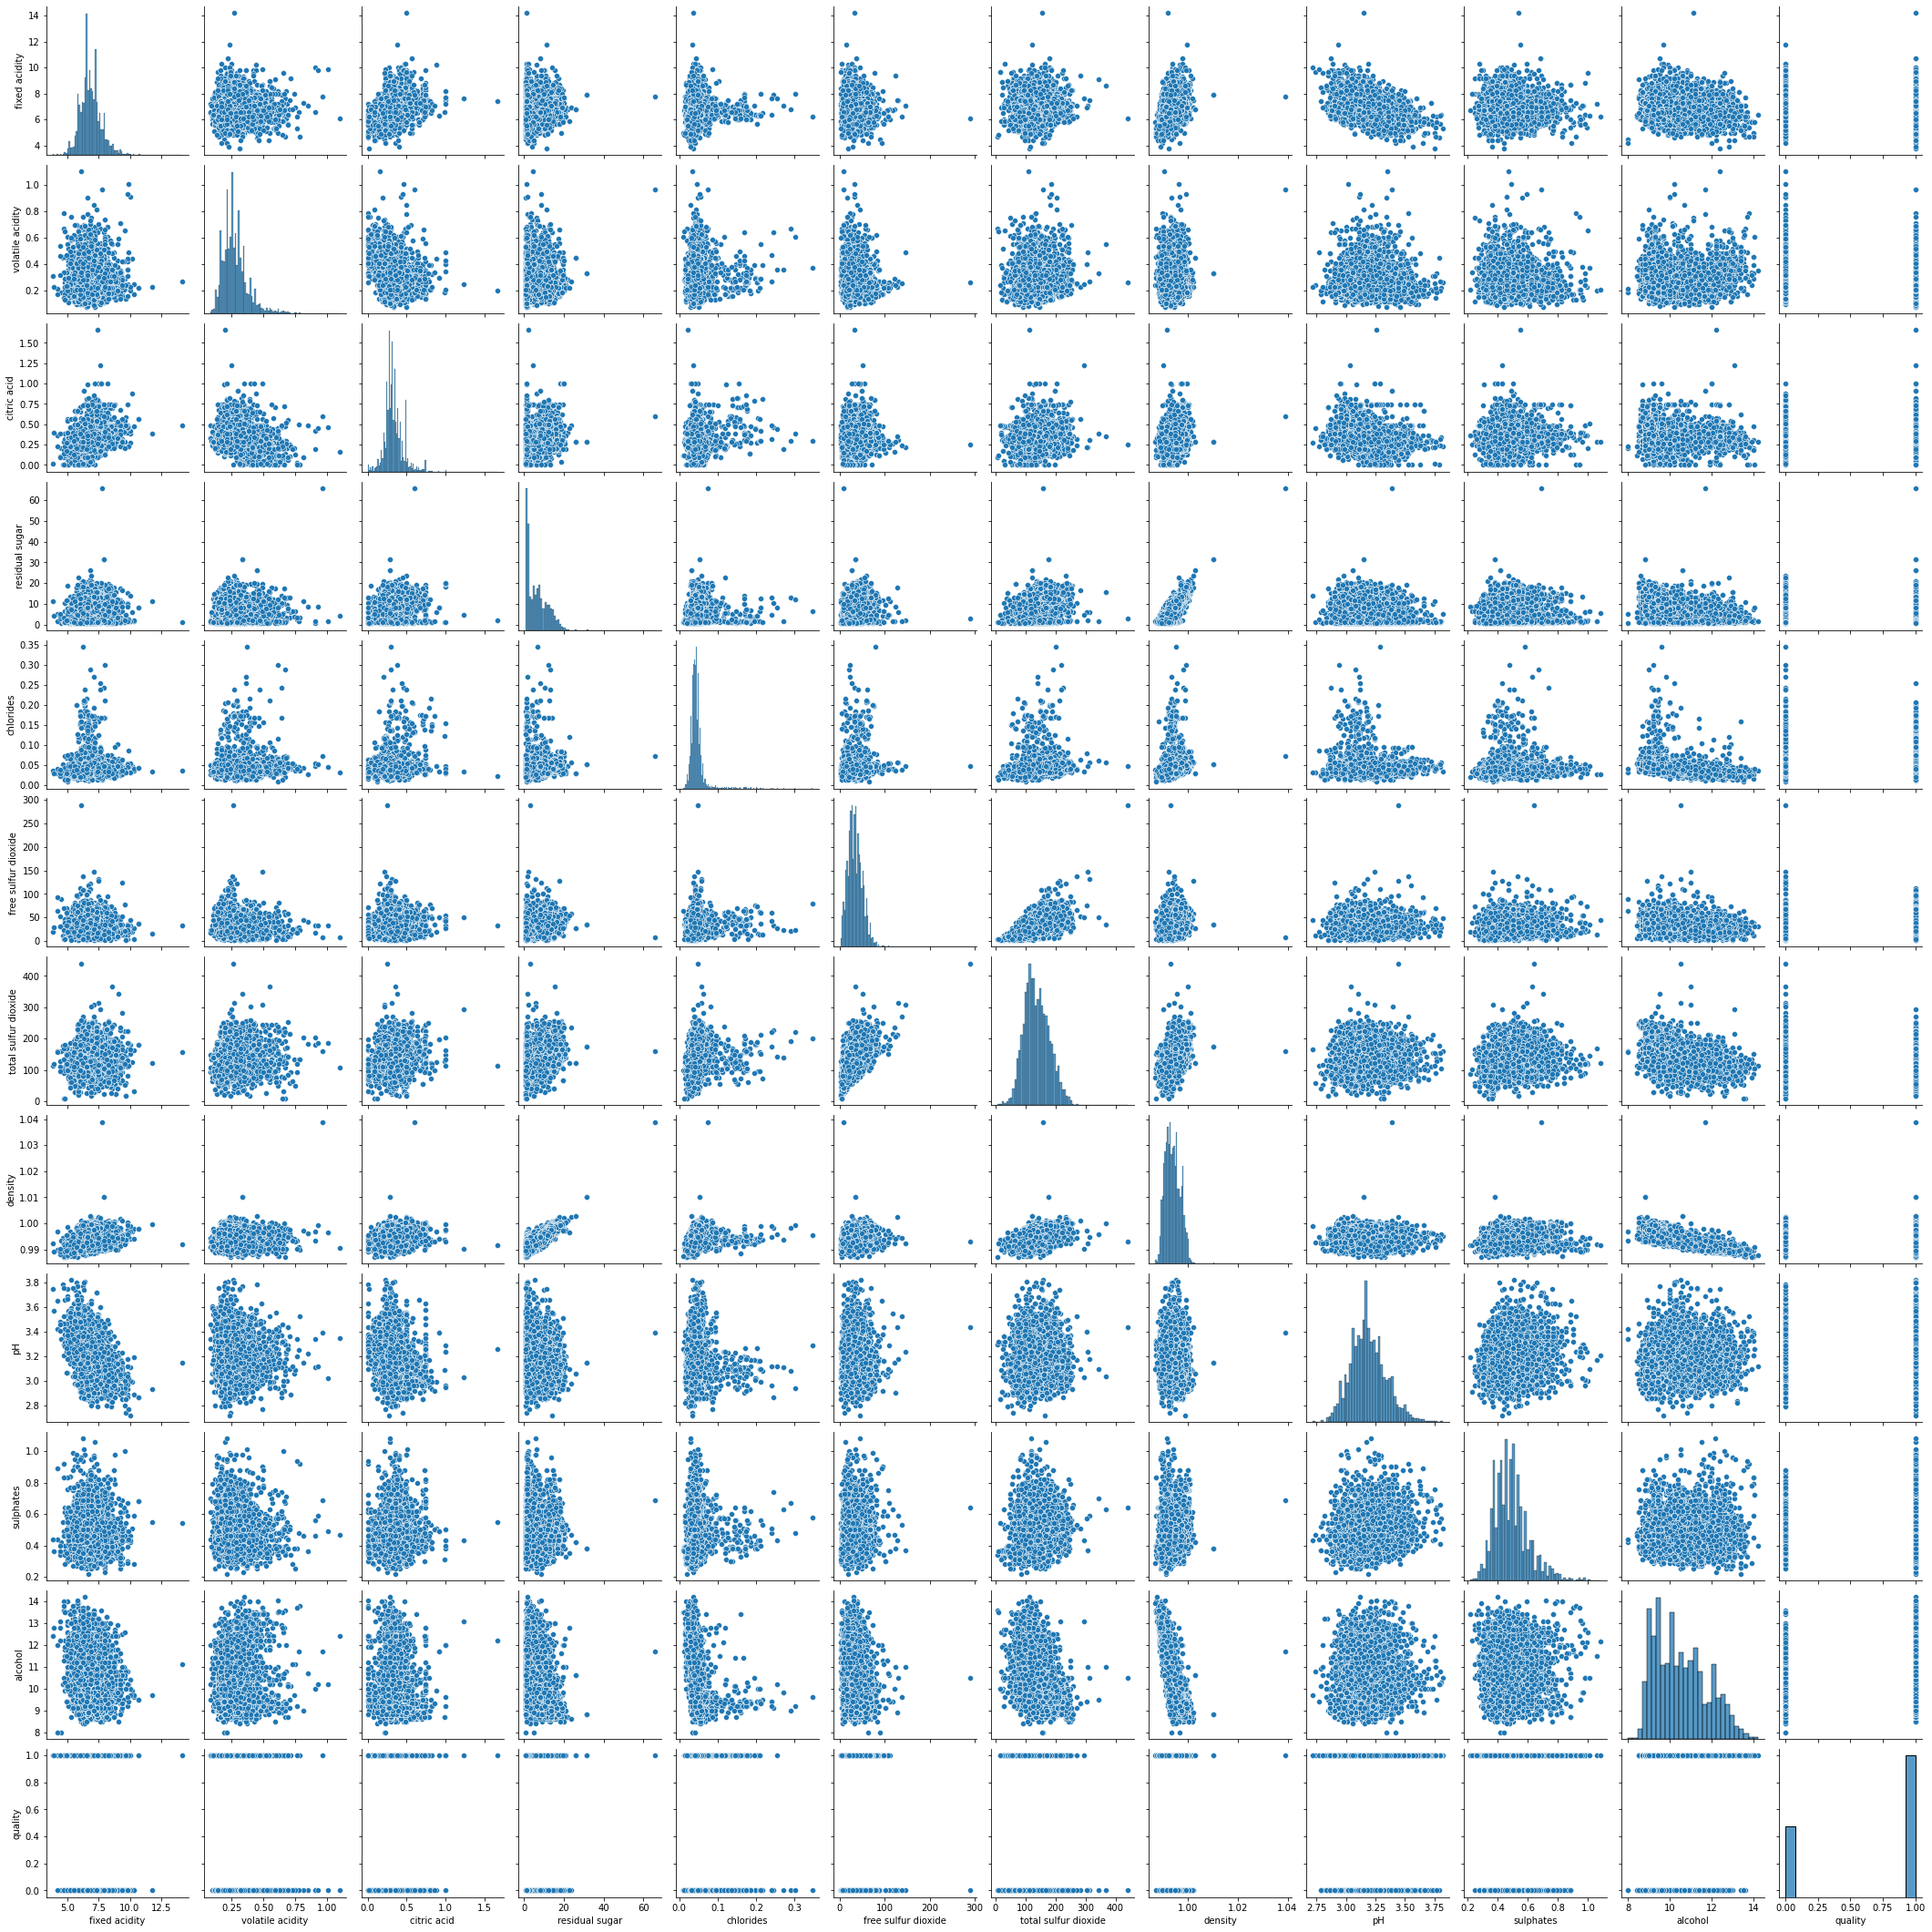

In [32]:
# Plot the corrolation between all of the given features
g = sns.pairplot(data=wine_data)
plt.show()

In [33]:
# Display the numeric corrolations of each feature for easier readability
wine_corr = wine_data.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.089749
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.225440
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.000700
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.092756
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.183939
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,-0.001278
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.170924
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.268696
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.083687
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.051858


In [34]:
# After looking at the corrolations it was determined that densit and 
# sugar had high corrolation (0.84) and so density was selected to be dropped
wine_data.drop("density", axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,3.34,0.38,12.8,1


## 16) Partition function

In [35]:
# Parttion the data into training and testinf data based on a given percentage
def partition(feature_Mat, target_Vec, t):
    part = math.floor(len(feature_Mat) * t)
    
    feature_train = feature_Mat[:part]
    feature_test = feature_Mat[part:]
    target_train = target_Vec[:part]
    target_test = target_Vec[part:]
    
    return feature_train, feature_test, target_train, target_test

## 13) KNN Classifier model test

In [36]:
# Actually running the partition function on the shuffled wine
# in this case 80% of the examples are used for trianing
# and 20% is used for testing
wine_features = shuffeled_wine.loc[:, shuffeled_wine.columns[:-1]]
wine_labels = shuffeled_wine.loc[:, shuffeled_wine.columns[-1:]]

feat_train, feat_test, target_train, target_test = partition(wine_features, wine_labels, .8)

In [37]:
feat_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4727,6.0,0.25,0.28,7.70,0.053,37.0,132.0,0.99489,3.06,0.50,9.4
3218,6.5,0.29,0.25,2.50,0.142,8.0,111.0,0.99270,3.00,0.44,9.9
2389,6.8,0.46,0.26,2.70,0.042,28.0,83.0,0.99114,3.38,0.51,12.0
4279,6.2,0.24,0.27,16.80,0.040,48.0,129.0,0.99691,3.23,0.38,10.5
3341,7.6,0.17,0.27,4.60,0.050,23.0,98.0,0.99422,3.08,0.47,9.5
...,...,...,...,...,...,...,...,...,...,...,...
4691,6.9,0.19,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.1
1218,7.2,0.26,0.44,7.10,0.027,25.0,126.0,0.99300,3.02,0.34,11.1
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8
2246,6.4,0.34,0.20,14.90,0.060,37.0,162.0,0.99830,3.13,0.45,9.0


In [38]:
# further reducing the testing data due to time consarints.
# Usning the original 450+ exmples would make each 
# test run for over 40 mins
target_test = target_test['quality'].tolist()[:100]

In [39]:
feat_test = feat_test.iloc[:100] 

---

### a) Unstandardized data, using eucledian distance and uniform weights

In [40]:
# Testing unstandardized data with eucledian distance 
# and uniform distibuation
t = KNN_Classifier()
t.fit(feat_train, target_train, 5, "uniform", "eucledian")
p = t.predict(feat_test)

In [41]:
reg_cm = confusionMatrix(target_test, p)
print(message.format("Confusion Matrix", reg_cm))
print(message.format("Precision:", pre(reg_cm)))
print(message.format("Recall", rec(reg_cm)))
print(message.format("F1", F1_score(reg_cm)))
print(message.format("Accuracy", accuracy(reg_cm)))

Confusion Matrix: [62  9 22  7]
Precision:: 0.7380952380952381
Recall: 0.8732394366197183
F1: 0.8
Accuracy: 0.69


----

### b) Standardize the data

In [42]:
# Standardizing the data using the mean ans standard diviation of each feature
s_mean = feat_train.mean()
s_std = feat_train.std()

standardized_feat_train = feat_train.apply(lambda row: (row + s_mean)/s_std, axis = 1)

stadardized_feat_test = feat_test.apply(lambda row: (row + s_mean)/s_std, axis = 1)

In [43]:
# Running the model on standardized data
stand_t = KNN_Classifier()
stand_t.fit(standardized_feat_train, target_train, 5, "uniform", "manhattan")
stand_p = stand_t.predict(stadardized_feat_test)

### c) Accuracy and F1 on standardized data

In [44]:
stand_cm = confusionMatrix(target_test, stand_p)
print(message.format("Confusion Matrix", stand_cm))
print(message.format("Precision:", pre(stand_cm)))
print(message.format("Recall", rec(stand_cm)))
print(message.format("F1", F1_score(stand_cm)))
print(message.format("Accuracy", accuracy(stand_cm)))

Confusion Matrix: [59 12 15 14]
Precision:: 0.7972972972972973
Recall: 0.8309859154929577
F1: 0.8137931034482759
Accuracy: 0.73


---

### d) Comapre standardized and unstandardized results

The standardized data will be used for the remainder of the assignment since it allowed for higher accuracy. Although, the recall is higher in the unstandarized data it could mean that the data was making false positives and could indicate an even higher accuracy boost than the data displayed

### e) Inverse distance weighing test

In [45]:
# Using the standarized data from above the model was once again run this 
# time using weighted distance metric
weighed_t = KNN_Classifier()
weighed_t.fit(standardized_feat_train, target_train, 5, "distance")
weighed_p = weighed_t.predict(stadardized_feat_test)

In [46]:
weighed_cm = confusionMatrix(target_test, weighed_p)
print(message.format("Confusion Matrix", weighed_cm))
print(message.format("Precision:", pre(weighed_cm)))
print(message.format("Recall", rec(weighed_cm)))
print(message.format("F1", F1_score(weighed_cm)))
print(message.format("Accuracy", accuracy(weighed_cm)))

Confusion Matrix: [56 15 16 13]
Precision:: 0.7777777777777778
Recall: 0.7887323943661971
F1: 0.7832167832167832
Accuracy: 0.69


For this example it was shown that wighted is not the ideal way to classify. However, this can be due to the limited number of testing data since only 100 were used as opposed to the partitioned 400+. When I ran this a couple times on the full testing data the accuracy was a few points higher with weighed distances a opposed to uniform distances.

---

## 18 & 19) Evalute performance of the model

---

### k = [1,5,9,311]
### distance = [eucledian, manhattan]
### weight = [uniform, distance]

---

##### k=1, distance = eucledian, weight = uniform

In [47]:
oneEU = KNN_Classifier()
oneEU.fit(standardized_feat_train, target_train, 1)
oneEU_p = oneEU.predict(stadardized_feat_test)

In [48]:
cm = confusionMatrix(target_test, oneEU_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [60 11 13 16]
Precision:: 0.821917808219178
Recall: 0.8450704225352113
F1: 0.8333333333333333
Accuracy: 0.76


##### k=5, distance = eucledian, weight = uniform

In [49]:
fiveEU = KNN_Classifier()
fiveEU.fit(standardized_feat_train, target_train, 5)
fiveEU_p = fiveEU.predict(stadardized_feat_test)

In [50]:
cm = confusionMatrix(target_test, fiveEU_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [57 14 15 14]
Precision:: 0.7916666666666666
Recall: 0.8028169014084507
F1: 0.7972027972027971
Accuracy: 0.71


##### k=9, distance = eucledian, weight = uniform

In [51]:
nineEU = KNN_Classifier()
nineEU.fit(standardized_feat_train, target_train, 9)
nineEU_p = nineEU.predict(stadardized_feat_test)

In [52]:
cm = confusionMatrix(target_test, nineEU_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [56 15 17 12]
Precision:: 0.7671232876712328
Recall: 0.7887323943661971
F1: 0.7777777777777778
Accuracy: 0.68


##### k=11, distance = eucledian, weight = uniform

In [53]:
elevenEU = KNN_Classifier()
elevenEU.fit(standardized_feat_train, target_train, 11)
elevenEU_p = elevenEU.predict(stadardized_feat_test)

In [54]:
cm = confusionMatrix(target_test, elevenEU_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [57 14 17 12]
Precision:: 0.7702702702702703
Recall: 0.8028169014084507
F1: 0.7862068965517242
Accuracy: 0.69


----

##### k=1, distance = eucledian, weight = distance

In [55]:
oneED = KNN_Classifier()
oneED.fit(standardized_feat_train, target_train, 1, "distance")
oneED_p = oneED.predict(stadardized_feat_test)

In [56]:
cm = confusionMatrix(target_test, oneED_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [60 11 19 10]
Precision:: 0.759493670886076
Recall: 0.8450704225352113
F1: 0.8
Accuracy: 0.7


##### k=5, distance = eucledian, weight = distance

In [57]:
fiveED = KNN_Classifier()
fiveED.fit(standardized_feat_train, target_train, 5, "distance")
fiveED_p = fiveED.predict(stadardized_feat_test)

In [58]:
cm = confusionMatrix(target_test, fiveED_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [56 15 16 13]
Precision:: 0.7777777777777778
Recall: 0.7887323943661971
F1: 0.7832167832167832
Accuracy: 0.69


##### k=9, distance = eucledian, weight = distance

In [59]:
nineED = KNN_Classifier()
nineED.fit(standardized_feat_train, target_train, 9, "distance")
nineED_p = nineED.predict(stadardized_feat_test)

In [60]:
cm = confusionMatrix(target_test, nineED_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [56 15 19 10]
Precision:: 0.7466666666666667
Recall: 0.7887323943661971
F1: 0.767123287671233
Accuracy: 0.66


##### k=11, distance = eucledian, weight = distance

In [61]:
elevenED = KNN_Classifier()
elevenED.fit(standardized_feat_train, target_train, 11, "distance")
elevenED_p = elevenED.predict(stadardized_feat_test)

In [62]:
cm = confusionMatrix(target_test, elevenED_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [57 14 19 10]
Precision:: 0.75
Recall: 0.8028169014084507
F1: 0.7755102040816326
Accuracy: 0.67


----

##### k=1, distance = manhattan, weight = uniform

In [63]:
oneMU = KNN_Classifier()
oneMU.fit(standardized_feat_train, target_train, 1, "uniform", "manhattan")
oneMU_p = oneMU.predict(stadardized_feat_test)

In [64]:
cm = confusionMatrix(target_test, oneMU_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [59 12 14 15]
Precision:: 0.8082191780821918
Recall: 0.8309859154929577
F1: 0.8194444444444445
Accuracy: 0.74


##### k=5, distance = manhattan, weight = uniform

In [65]:
fiveMU = KNN_Classifier()
fiveMU.fit(standardized_feat_train, target_train, 5, "uniform", "manhattan")
fiveMU_p = fiveMU.predict(stadardized_feat_test)

In [66]:
cm = confusionMatrix(target_test, fiveMU_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [59 12 15 14]
Precision:: 0.7972972972972973
Recall: 0.8309859154929577
F1: 0.8137931034482759
Accuracy: 0.73


##### k=9, distance = manhattan, weight = uniform

In [67]:
nineMU = KNN_Classifier()
nineMU.fit(standardized_feat_train, target_train, 9, "uniform", "manhattan")
nineMU_p = nineMU.predict(stadardized_feat_test)

In [68]:
cm = confusionMatrix(target_test, nineMU_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [55 16 17 12]
Precision:: 0.7638888888888888
Recall: 0.7746478873239436
F1: 0.7692307692307692
Accuracy: 0.67


##### k=11, distance = manhattan, weight = uniform

In [69]:
elevenMU = KNN_Classifier()
elevenMU.fit(standardized_feat_train, target_train, 11, "uniform", "manhattan")
elevenMU_p = elevenMU.predict(stadardized_feat_test)

In [70]:
cm = confusionMatrix(target_test, elevenMU_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [58 13 16 13]
Precision:: 0.7837837837837838
Recall: 0.8169014084507042
F1: 0.8
Accuracy: 0.71


----

##### k=1, distance = manhattan, weight = distance

In [71]:
oneMD = KNN_Classifier()
oneMD.fit(standardized_feat_train, target_train, 1, "distance", "manhattan")
oneMD_p = oneMD.predict(stadardized_feat_test)

In [72]:
cm = confusionMatrix(target_test, oneMD_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [59 12 20  9]
Precision:: 0.7468354430379747
Recall: 0.8309859154929577
F1: 0.7866666666666666
Accuracy: 0.68


##### k=5, distance = manhattan, weight = distance

In [73]:
fiveMD = KNN_Classifier()
fiveMD.fit(standardized_feat_train, target_train, 5, "distance", "manhattan")
fiveMD_p = fiveMD.predict(stadardized_feat_test)

In [74]:
cm = confusionMatrix(target_test, fiveMD_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [58 13 16 13]
Precision:: 0.7837837837837838
Recall: 0.8169014084507042
F1: 0.8
Accuracy: 0.71


##### k=9, distance = manhattan, weight = distance

In [75]:
nineMD = KNN_Classifier()
nineMD.fit(standardized_feat_train, target_train, 9, "distance", "manhattan")
nineMD_p = nineMD.predict(stadardized_feat_test)

In [76]:
cm = confusionMatrix(target_test, nineMD_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [55 16 18 11]
Precision:: 0.7534246575342466
Recall: 0.7746478873239436
F1: 0.7638888888888888
Accuracy: 0.66


##### k=11, distance = manhattan, weight = distance

In [77]:
elevenMD = KNN_Classifier()
elevenMD.fit(standardized_feat_train, target_train, 10, "distance", "manhattan")
elevenMD_p = elevenMD.predict(stadardized_feat_test)

In [79]:
cm = confusionMatrix(target_test, elevenMD_p)
print(message.format("Confusion Matrix", cm))
print(message.format("Precision:", pre(cm)))
print(message.format("Recall", rec(cm)))
print(message.format("F1", F1_score(cm)))
print(message.format("Accuracy", accuracy(cm)))

Confusion Matrix: [56 15 18 11]
Precision:: 0.7567567567567568
Recall: 0.7887323943661971
F1: 0.7724137931034482
Accuracy: 0.67
